# **Análise de Correlação - Preço do Petróleo x temperatura**

A presente análise tem como objetivo investigar a possível relação entre o preço do petróleo e as variações de temperatura dos países que tem acesso ao mar do norte (local onde o petróleo Brent é extraído). Este estudo busca compreender se existe uma correlação significativa entre esses dois fatores, considerando a hipótese de que mudanças climáticas podem influenciar os preços do petróleo.

**Países Selecionados para Análise Climática na Região do Mar do Norte**

A seleção dos países considerou aqueles com acesso ao Mar do Norte, conforme indicado por informações disponíveis neste [link](https://www.infopedia.pt/apoio/artigos/$mar-do-norte#:~:text=Os%20limites%20geogr%C3%A1ficos%20do%20mar,de%20570%20000%20km2) e com base nos mapas da região, os países selecionados são:

* Reino Unido (Inglaterra e Escócia, que têm acesso ao Mar do Norte)
* França
* Bélgica
* Países Baixos (Holanda)
* Alemanha
* Dinamarca
* Noruega
* Suécia

Para cada um desses países, foram extraídas informações climáticas diárias da base de dados do NOAA - National Oceanic and Atmospheric Administration. Os dados incluem informações sobre temperatura, como:

* Temperatura Mínima (TMIN)
* Temperatura Máxima (TMAX)
* Precipitação (PRCP)
* Acúmulo de Neve (SNWD)

Para garantir representatividade nas condições climáticas próximas ao Mar do Norte, uma única estação meteorológica em localizações mais próximas da costa foi escolhida em cada país. Essa abordagem visa fornecer dados mais precisos e alinhados com o comportamento climático real na região, excluindo estações que podem não refletir as condições específicas do Mar do Norte. Este conjunto de dados climáticos será analisado em conjunto com informações sobre o preço do petróleo, permitindo uma investigação mais aprofundada sobre as possíveis relações entre as condições climáticas e as flutuações nos preços do petróleo.

In [ ]:
# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Clonando o repositório para utilização neste notebook
!git clone https://github.com/pehls/gp27_techchallenge_4.git

Cloning into 'gp27_techchallenge_4'...
remote: Enumerating objects: 198, done.
remote: Counting objects: 100% (198/198), done.
remote: Compressing objects: 100% (128/128), done.
remote: Total 198 (delta 95), reused 167 (delta 64), pack-reused 0
Receiving objects: 100% (198/198), 6.03 MiB | 19.65 MiB/s, done.
Resolving deltas: 100% (95/95), done.


In [ ]:
df_france = pd.read_csv('/content/gp27_techchallenge_4/data/raw/noaa-temp/france.csv')
df_norway = pd.read_csv('/content/gp27_techchallenge_4/data/raw/noaa-temp/norway.csv')
df_england = pd.read_csv('/content/gp27_techchallenge_4/data/raw/noaa-temp/england.csv')
df_scotland = pd.read_csv('/content/gp27_techchallenge_4/data/raw/noaa-temp/scotland.csv')
df_belgium = pd.read_csv('/content/gp27_techchallenge_4/data/raw/noaa-temp/belgium.csv')
df_sweden = pd.read_csv('/content/gp27_techchallenge_4/data/raw/noaa-temp/sweden.csv')
df_netherlands = pd.read_csv('/content/gp27_techchallenge_4/data/raw/noaa-temp/netherlands.csv')
df_germany = pd.read_csv('/content/gp27_techchallenge_4/data/raw/noaa-temp/germany.csv')
df_denmark = pd.read_csv('/content/gp27_techchallenge_4/data/raw/noaa-temp/denmark.csv')

In [ ]:
df_england.head()

,STATION,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNWD,TMAX,TMIN
0,UKE00107650,51.4789,0.4489,25.0,1987-01-01,0.02,0.0,46.0,44
1,UKE00107650,51.4789,0.4489,25.0,1987-01-02,0.00,0.0,41.0,40
2,UKE00107650,51.4789,0.4489,25.0,1987-01-03,0.00,0.0,51.0,34
3,UKE00107650,51.4789,0.4489,25.0,1987-01-04,0.20,0.0,48.0,30
4,UKE00107650,51.4789,0.4489,25.0,1987-01-05,0.00,0.0,43.0,41


In [ ]:
lista_dfs = [df_france, df_norway, df_england, df_scotland, df_belgium, df_sweden, df_netherlands, df_germany, df_denmark]

In [ ]:
def remover_colunas(df, pais):
    colunas_para_remover = ['STATION', 'LATITUDE', 'LONGITUDE', 'ELEVATION']
    colunas_existentes = [coluna for coluna in colunas_para_remover if coluna in df.columns]

    if colunas_existentes:
        df = df.drop(colunas_existentes, axis=1)
        print(f"Colunas removidas para {pais}: {colunas_existentes}")
    else:
        print(f"Nenhuma coluna para remover para {pais}.")

    return df

# Exemplo de uso:
for i, pais in enumerate(lista_dfs):
    print(f"Atualizando DataFrame {i + 1}")
    lista_dfs[i] = remover_colunas(lista_dfs[i], pais)

# Atualizar as variáveis originais
df_france, df_norway, df_england, df_scotland, df_belgium, df_sweden, df_netherlands, df_germany, df_denmark = lista_dfs

Atualizando DataFrame 1
Nenhuma coluna para remover para                     NAME        DATE  PRCP  SNWD  TMAX  TMIN
0      LILLE LESQUIN, FR  1987-01-01  0.56   NaN  54.0  45.0
1      LILLE LESQUIN, FR  1987-01-02  0.06   NaN  48.0  41.0
2      LILLE LESQUIN, FR  1987-01-03  0.00   NaN  37.0  29.0
3      LILLE LESQUIN, FR  1987-01-04  0.27   NaN  48.0  31.0
4      LILLE LESQUIN, FR  1987-01-05  0.00   NaN  46.0  35.0
...                  ...         ...   ...   ...   ...   ...
13509  LILLE LESQUIN, FR  2024-01-02  0.39   NaN  57.0  45.0
13510  LILLE LESQUIN, FR  2024-01-03  0.82   NaN  54.0  48.0
13511  LILLE LESQUIN, FR  2024-01-04  0.16   NaN  51.0  44.0
13512  LILLE LESQUIN, FR  2024-01-05  0.09   NaN  51.0  42.0
13513  LILLE LESQUIN, FR  2024-01-06  0.09   NaN   NaN   NaN

[13514 rows x 6 columns].
Atualizando DataFrame 2
Nenhuma coluna para remover para              DATE  PRCP  SNWD  TMAX  TMIN
0      1987-01-01  0.00  15.7  28.0  15.0
1      1987-01-02  0.06  15.7  28.0  12.0
2

In [ ]:
def converter_data(df_pais, pais):
    # Fazer uma cópia do DataFrame antes de aplicar a função
    df_copy = df_pais.copy()
    df_copy['DATE'] = pd.to_datetime(df_copy['DATE'], errors='coerce')
    print(f'Data convertida para {pais}.')
    return df_copy

# Exemplo de uso:
# Aplicar a função a cada DataFrame na lista
lista_dfs_atualizados = [converter_data(df, pais) for df, pais in zip(lista_dfs, ['France', 'Norway', 'England', 'Scotland', 'Belgium', 'Sweden', 'Netherlands', 'Germany', 'Denmark'])]

# Atribuir os dataframes atualizados de volta à lista
df_france, df_norway, df_england, df_scotland, df_belgium, df_sweden, df_netherlands, df_germany, df_denmark = lista_dfs_atualizados

# Verificar os tipos de dados
for df in lista_dfs_atualizados:
    print(df['DATE'].dtype)

Data convertida para France.
Data convertida para Norway.
Data convertida para England.
Data convertida para Scotland.
Data convertida para Belgium.
Data convertida para Sweden.
Data convertida para Netherlands.
Data convertida para Germany.
Data convertida para Denmark.
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]


In [ ]:
# Organizando os dados do petróleo
df = pd.read_html('http://www.ipeadata.gov.br/ExibeSerie.aspx?module=m&serid=1650971490&oper=view', decimal=',', thousands='.', parse_dates=True)[2][1:]
df.columns=['DATE','PRECO']
df.DATE = pd.to_datetime(df.DATE, dayfirst=True)
df['PRECO'] = pd.to_numeric(df['PRECO'], errors='coerce')

df.head()

,DATE,PRECO
1,2024-01-08,75.47
2,2024-01-05,78.31
3,2024-01-04,75.79
4,2024-01-03,77.18
5,2024-01-02,76.24


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11082 entries, 1 to 11082
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    11082 non-null  datetime64[ns]
 1   PRECO   11082 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 173.3 KB


In [ ]:
df_france.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13514 entries, 0 to 13513
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   NAME    13514 non-null  object        
 1   DATE    13514 non-null  datetime64[ns]
 2   PRCP    13509 non-null  float64       
 3   SNWD    155 non-null    float64       
 4   TMAX    13202 non-null  float64       
 5   TMIN    12969 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 633.6+ KB


In [ ]:
def adicionar_preco_a_lista_dfs(df_principal, lista_dfs):
    for i, df_pais in enumerate(lista_dfs):
        # Garantir que a coluna 'DATE' seja do mesmo tipo nos dois DataFrames
        df_principal['DATE'] = pd.to_datetime(df_principal['DATE'])
        df_pais['DATE'] = pd.to_datetime(df_pais['DATE'])

        # Mesclar a coluna 'PRECO' do DataFrame principal no DataFrame do país com base na coluna 'DATE'
        lista_dfs[i] = pd.merge(df_pais, df_principal[['DATE', 'PRECO']], on='DATE', how='left', suffixes=('', '_PRINCIPAL'))

    return lista_dfs

# (Assumindo que você já possui df e lista_dfs criados)
lista_dfs_atualizada = adicionar_preco_a_lista_dfs(df, lista_dfs)

# Atribuir os dataframes atualizados de volta à lista
df_france, df_norway, df_england, df_scotland, df_belgium, df_sweden, df_netherlands, df_germany, df_denmark = lista_dfs_atualizada

# Verificar um exemplo (imprimir as primeiras linhas de df_france após a atualização)
print(df_france.head())

                NAME       DATE  PRCP  SNWD  TMAX  TMIN  PRECO
0  LILLE LESQUIN, FR 1987-01-01  0.56   NaN  54.0  45.0    NaN
1  LILLE LESQUIN, FR 1987-01-02  0.06   NaN  48.0  41.0    NaN
2  LILLE LESQUIN, FR 1987-01-03  0.00   NaN  37.0  29.0    NaN
3  LILLE LESQUIN, FR 1987-01-04  0.27   NaN  48.0  31.0    NaN
4  LILLE LESQUIN, FR 1987-01-05  0.00   NaN  46.0  35.0    NaN


In [ ]:
columns_to_normalize = ['PRCP', 'SNWD', 'TMAX', 'TMIN', 'PRECO']

In [ ]:
def normalizar_colunas(df, columns_to_normalize):
    scaler = MinMaxScaler()
    df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
    return df

lista_dfs = [normalizar_colunas(df, columns_to_normalize) for df in lista_dfs]

In [ ]:
df_germany.head()

,DATE,PRCP,SNWD,TMAX,TMIN,PRECO
0,1987-01-01,0.069307,0.000000,0.352273,0.478873,NaN
1,1987-01-02,0.006601,0.092486,0.215909,0.394366,NaN
2,1987-01-03,0.000000,0.115607,0.238636,0.267606,NaN
3,1987-01-04,0.188119,0.092486,0.215909,0.281690,NaN
4,1987-01-05,0.052805,0.202312,0.272727,0.478873,NaN


Colunas em France: Index(['NAME', 'DATE', 'PRCP', 'SNWD', 'TMAX', 'TMIN', 'PRECO'], dtype='object')


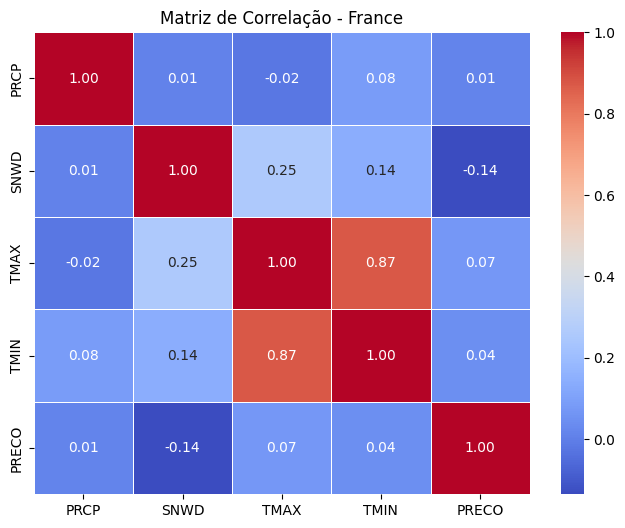

Colunas em Norway: Index(['DATE', 'PRCP', 'SNWD', 'TMAX', 'TMIN', 'PRECO'], dtype='object')


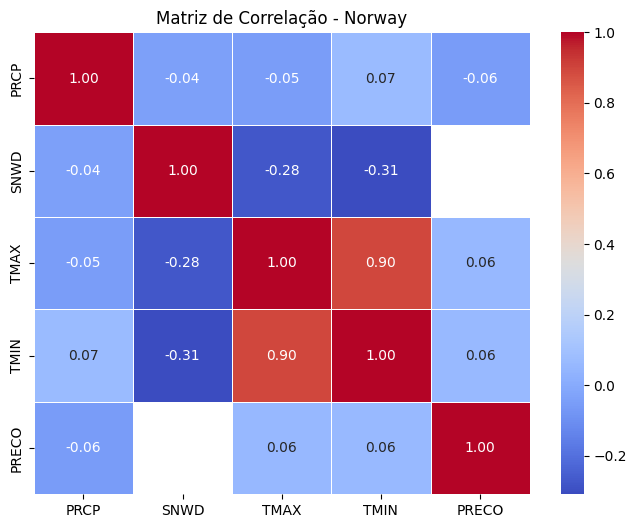

Colunas em England: Index(['DATE', 'PRCP', 'SNWD', 'TMAX', 'TMIN', 'PRECO'], dtype='object')


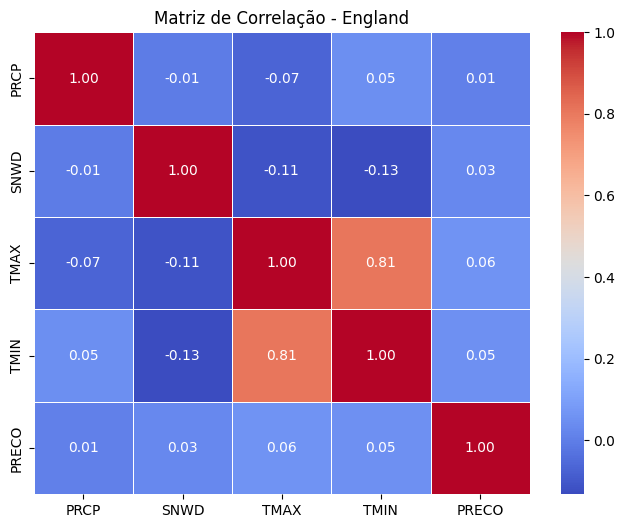

Colunas em Scotland: Index(['NAME', 'DATE', 'PRCP', 'SNWD', 'TMAX', 'TMIN', 'PRECO'], dtype='object')


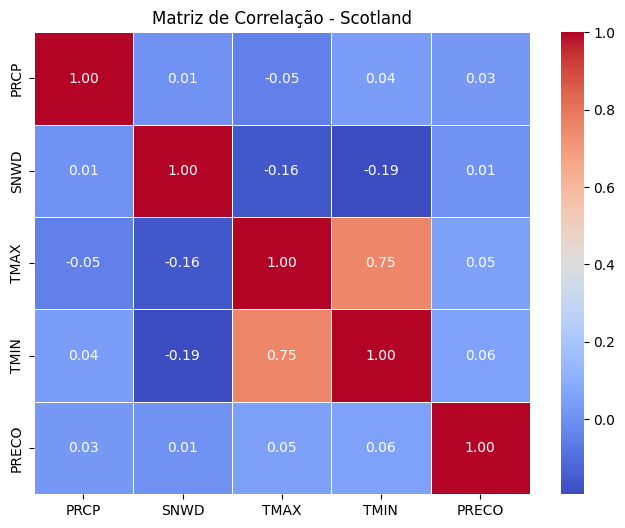

Colunas em Belgium: Index(['DATE', 'PRCP', 'SNWD', 'TMAX', 'TMIN', 'PRECO'], dtype='object')


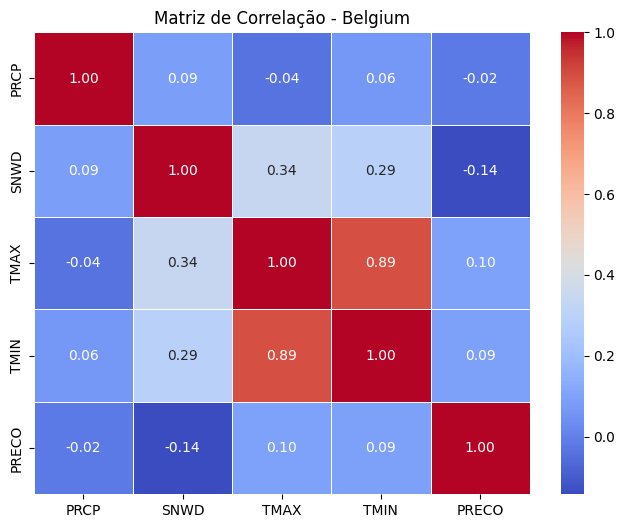

Colunas em Sweden: Index(['DATE', 'PRCP', 'SNWD', 'TMAX', 'TMIN', 'PRECO'], dtype='object')


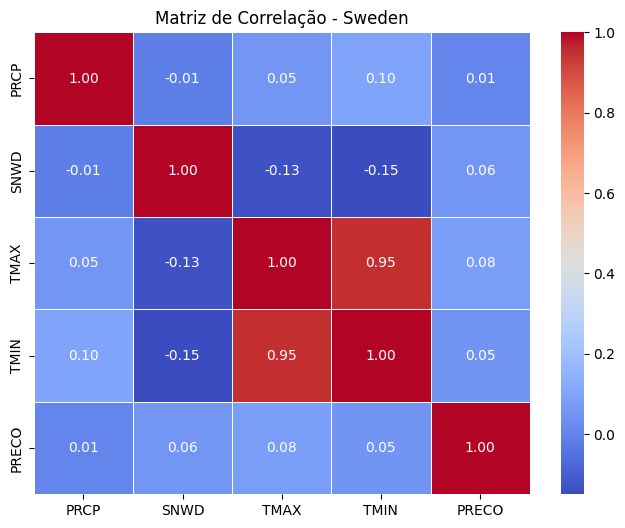

Colunas em Netherlands: Index(['DATE', 'PRCP', 'SNWD', 'TMAX', 'TMIN', 'PRECO'], dtype='object')


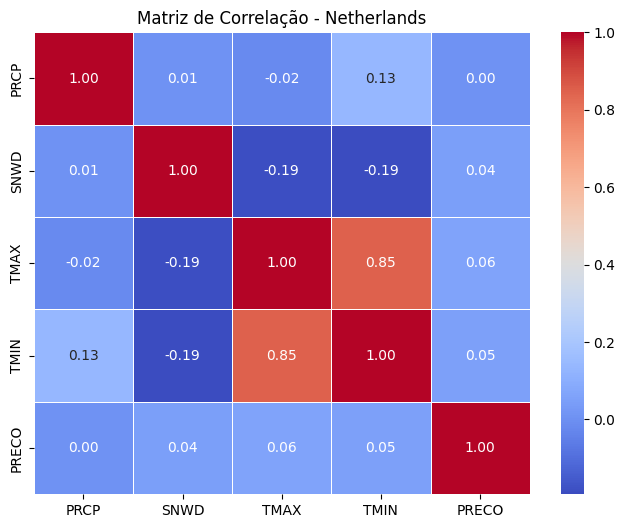

Colunas em Germany: Index(['DATE', 'PRCP', 'SNWD', 'TMAX', 'TMIN', 'PRECO'], dtype='object')


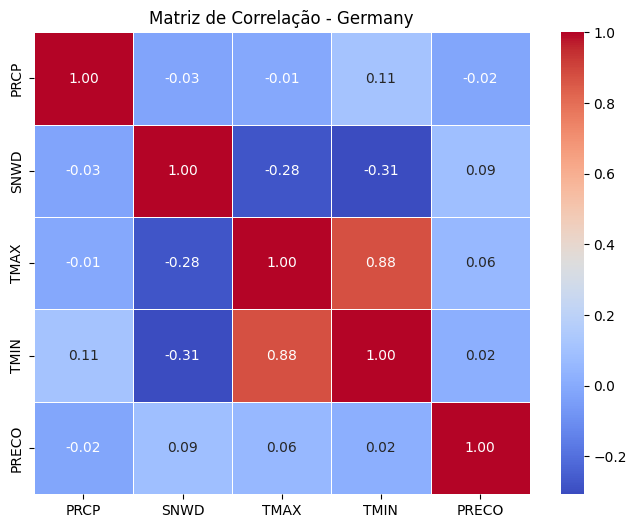

Colunas em Denmark: Index(['DATE', 'PRCP', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'PRECO'], dtype='object')


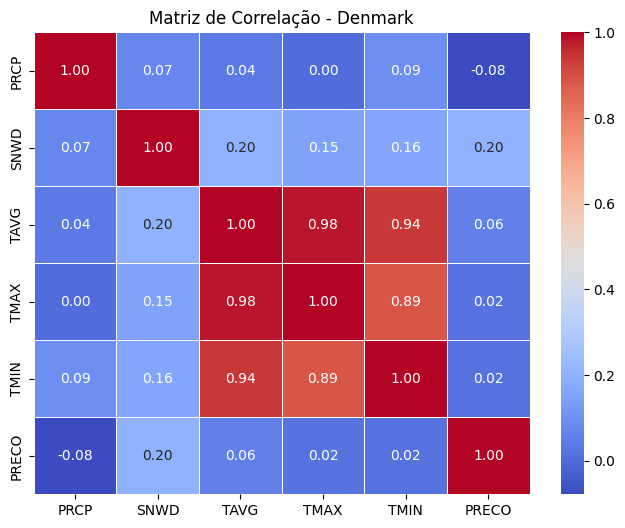

In [ ]:
def calcular_correlacao(df, pais):
    # Verificar as colunas disponíveis no DataFrame
    print(f'Colunas em {pais}: {df.columns}')

    # Selecionar apenas as colunas numéricas
    df_numerico = df.select_dtypes(include='number')

    # Calcular a matriz de correlação
    matriz_correlacao = df_numerico.corr()

    # Plotar o mapa de calor para a matriz de correlação
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f'Matriz de Correlação - {pais}')
    plt.show()

# Lista de DataFrames
lista_dfs = [df_france, df_norway, df_england, df_scotland, df_belgium, df_sweden, df_netherlands, df_germany, df_denmark]

# Calcular a correlação para cada DataFrame na lista
for df, pais in zip(lista_dfs, ['France', 'Norway', 'England', 'Scotland', 'Belgium', 'Sweden', 'Netherlands', 'Germany', 'Denmark']):
    calcular_correlacao(df, pais)

Com base nas análises das matrizes de correlação, destacam-se algumas observações notáveis:

Na Bélgica e na França, foi identificada uma correlação negativa de aproximadamente 15% entre o preço do petróleo e a quantidade de neve. Essa descoberta sugere uma relação inversa entre esses dois indicadores nesses países específicos.

Em contraste, a Dinamarca apresenta uma correlação positiva significativa de 20% entre a quantidade de neve e o preço do petróleo. Essa associação positiva indica que, na Dinamarca, o aumento na quantidade de neve está correlacionado com um aumento no preço do petróleo Brent.

Diante dessas conclusões, a análise agora se volta para a exploração de outros indicadores que possam apresentar correlações mais robustas e impactantes no preço do petróleo Brent.

# **Referências**

* https://www.kaggle.com/datasets/noaa/noaa-global-historical-climatology-network-daily

* https://www.infopedia.pt/apoio/artigos/$mar-do-norte#:~:text=Os%20limites%20geogr%C3%A1ficos%20do%20mar,de%20570%20000%20km2

* https://www.ncei.noaa.gov/cdo-web/search